In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [168]:
customers = pd.read_csv('Mall_Customers.csv')

In [169]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [170]:
customers.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [171]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

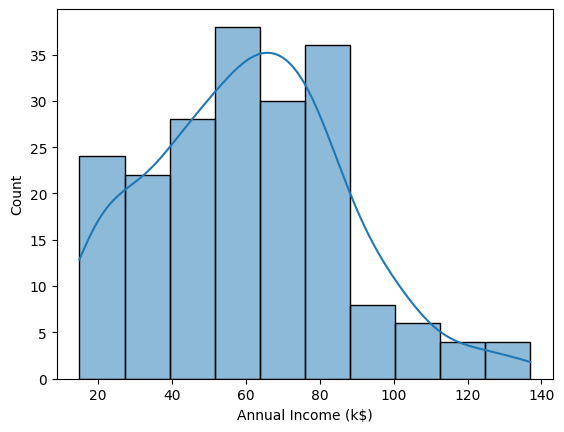

In [172]:
sns.histplot(customers['Annual Income (k$)'], kde=True)

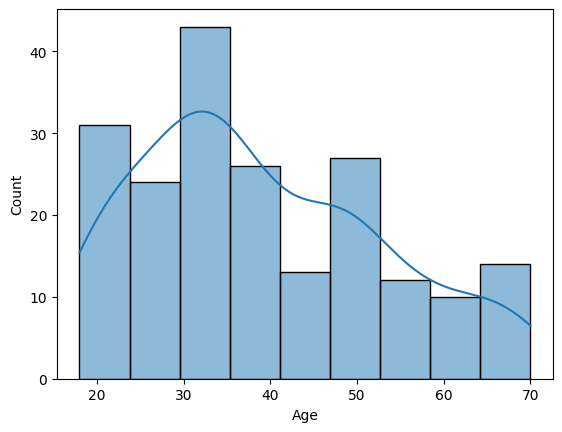

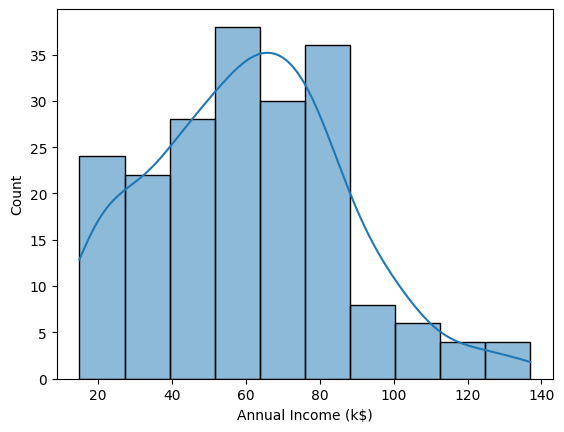

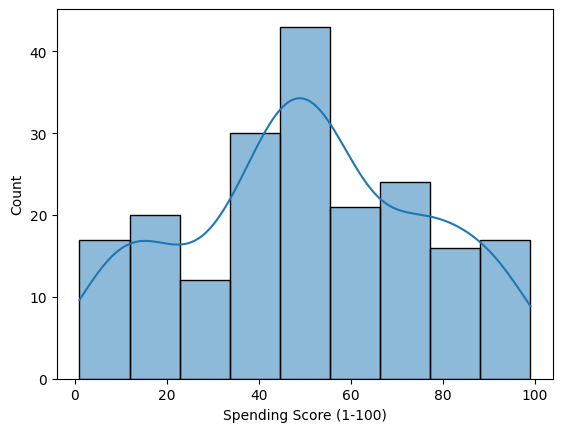

In [173]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.histplot(customers[i], kde=True)

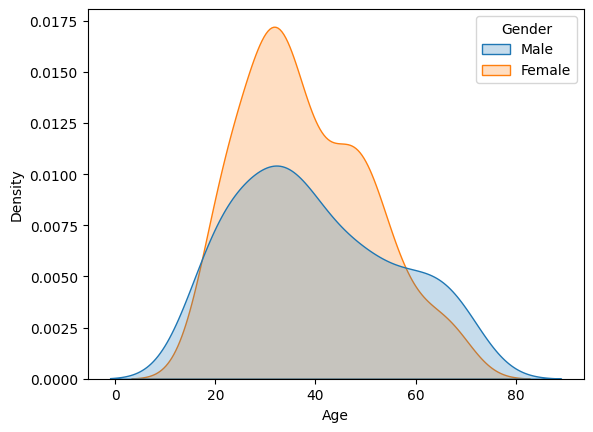

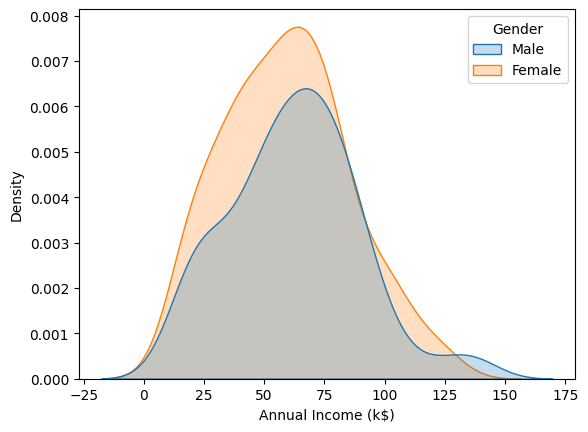

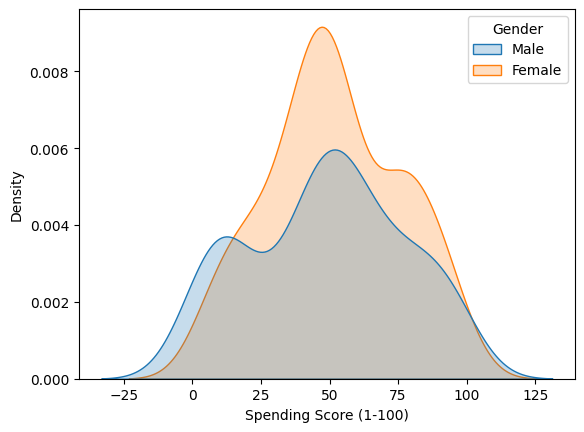

In [174]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(data=customers, x=i, fill=True, hue=customers['Gender'])

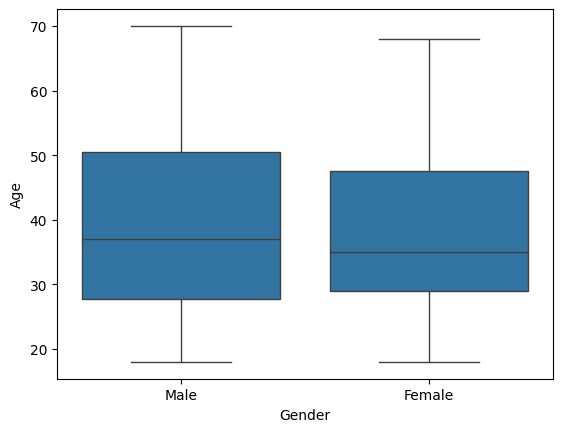

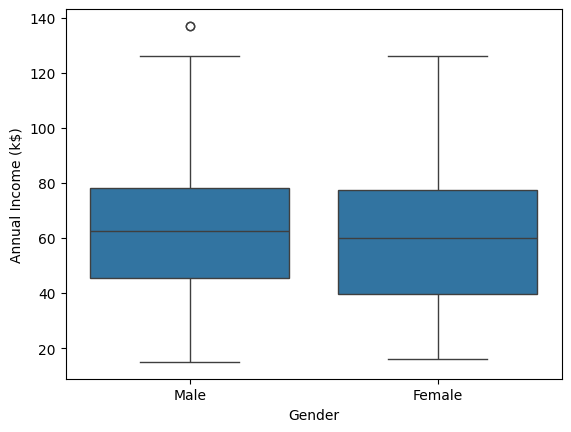

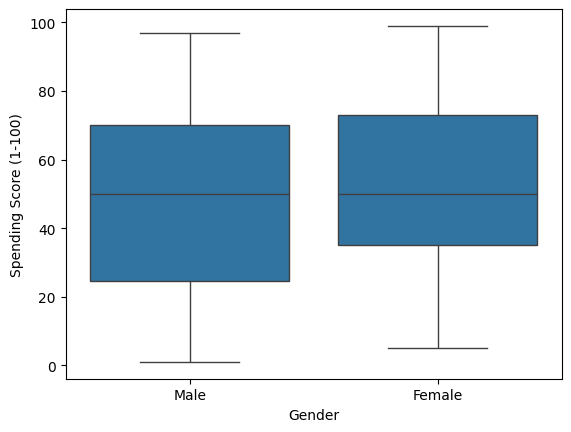

In [175]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data=customers, x='Gender', y=customers[i])

In [176]:
customers['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

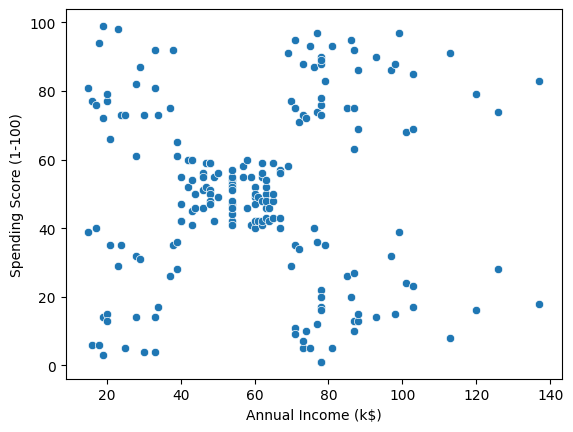

In [178]:
sns.scatterplot(data=customers, x='Annual Income (k$)', y='Spending Score (1-100)')

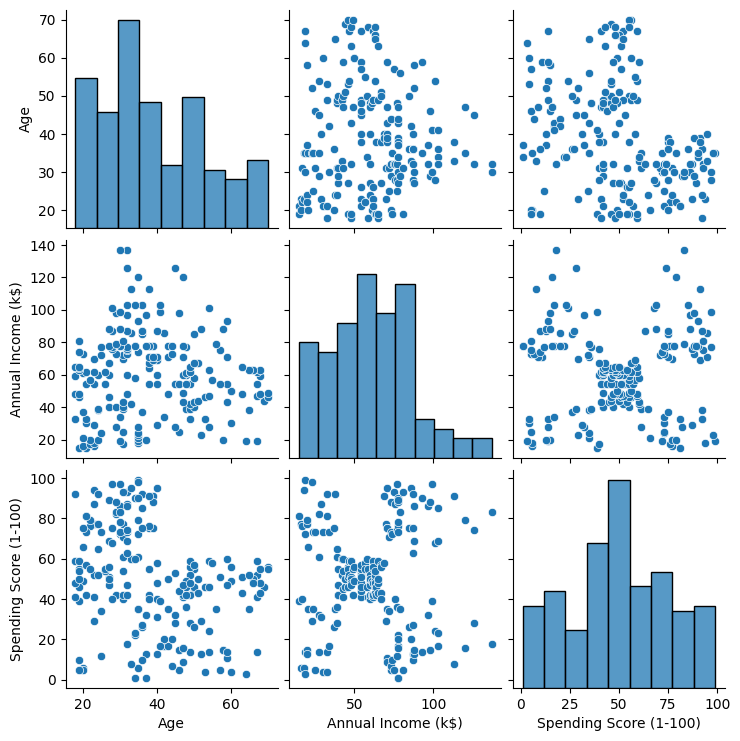

In [181]:
customers = customers.drop(columns=['CustomerID'], axis=1)
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.pairplot(customers[selected_features])

In [183]:
customers.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [185]:
customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

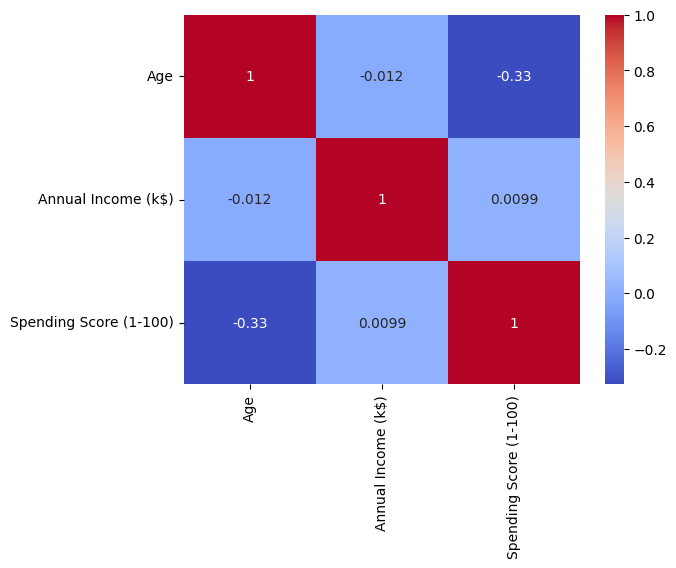

In [186]:
numeric_cols = customers.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [188]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(customers[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [189]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [190]:
customers['Income Cluster'] = clustering1.labels_
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [191]:
customers['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [192]:
clustering1.inertia_

25640.457784396836

In [194]:
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customers[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [195]:
inertia_scores

[137277.28,
 48660.888888888876,
 23528.152173913044,
 17410.741031941034,
 9407.908188585607,
 5103.823725981621,
 4268.444017094017,
 2841.148717948717,
 2463.4640637140637,
 1976.8580586080584]

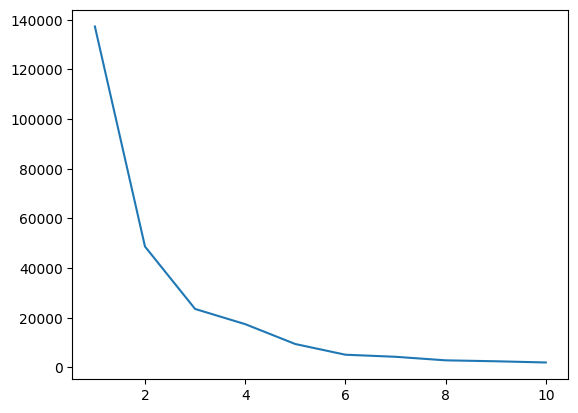

In [196]:
plt.plot(range(1,11), inertia_scores)

In [198]:
customers.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


In [200]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(customers[['Annual Income (k$)', 'Spending Score (1-100)']])
customers['Spending and Income Cluster'] = clustering2.labels_
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,0
2,Female,20,16,6,2,4
3,Female,23,16,77,2,0
4,Female,31,17,40,2,4


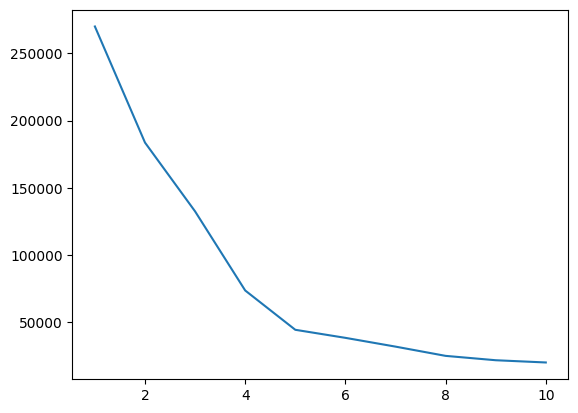

In [202]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(customers[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
    
plt.plot(range(1,11), inertia_scores2)

In [207]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

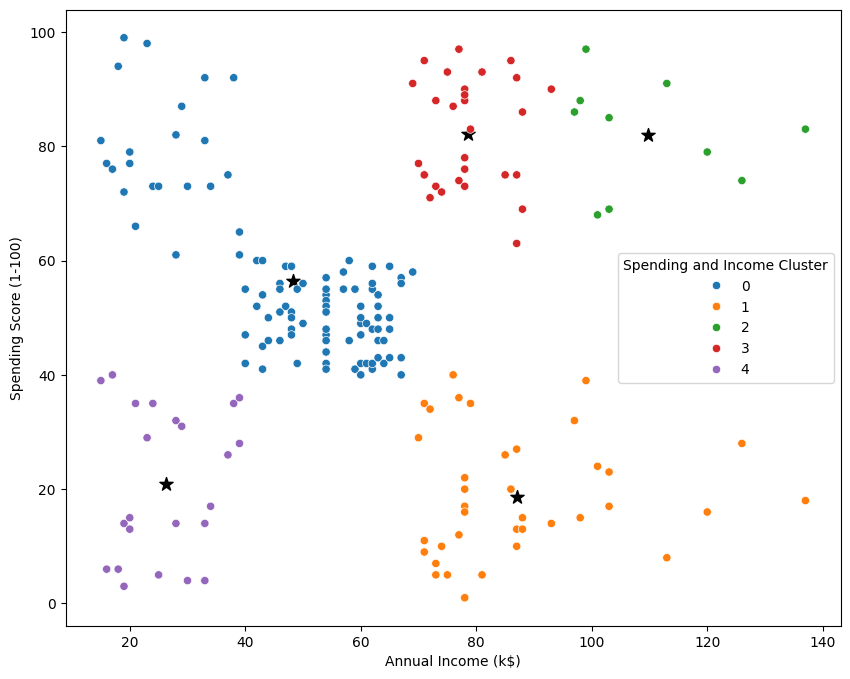

In [208]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=customers, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

In [209]:
pd.crosstab(customers['Spending and Income Cluster'], customers['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590000,0.410000
1,0.473684,0.526316
2,0.600000,0.400000
3,0.517241,0.482759
4,0.608696,0.391304


In [210]:
customers.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,39.200000,48.260000,56.480000
1,40.394737,87.000000,18.631579
2,32.200000,109.700000,82.000000
3,32.862069,78.551724,82.172414
4,45.217391,26.304348,20.913043


In [212]:
std_scaler = StandardScaler()

In [213]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,0
2,Female,20,16,6,2,4
3,Female,23,16,77,2,0
4,Female,31,17,40,2,4


In [215]:
customerss = pd.get_dummies(customers, drop_first=True)
customerss.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,4,True
1,21,15,81,2,0,True
2,20,16,6,2,4,False
3,23,16,77,2,0,False
4,31,17,40,2,4,False


In [217]:
customerss = customerss[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
customerss.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [218]:
customerss = std_scaler.fit_transform(customerss)

In [219]:
customerss = pd.DataFrame(std_scaler.fit_transform(customerss))
customerss.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


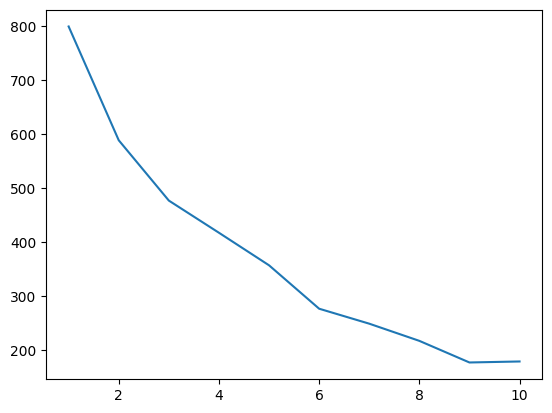

In [220]:
inertia_scores3 = []

for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(customerss)
    inertia_scores3.append(kmeans3.inertia_)
    
plt.plot(range(1,11), inertia_scores3)